#Question 1: Pseudocolors

##1- Loading the image

Mounted at /content/drive


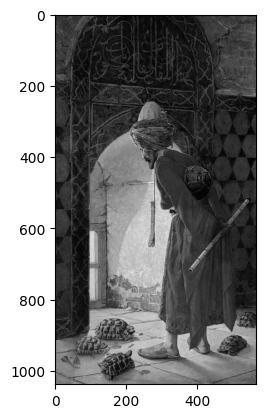

In [ ]:
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the image in Google Drive
image_file = '/content/drive/My Drive/Assignment-2/q1_kaplumbaga_terbiyecisi_osman_hamdi_bey.jpg'

# Load the image
mr_hamdi = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

plt.imshow(mr_hamdi, cmap="gray")

##2- Non-linear and Derivable Mapping Function

Here, the function was chosen as sigmoid, as it is a non-linear function that is commonly used in binary classification. It returns the probability of the input being belong to a class.

In this question, this logic is applied to decide the probability of the grayscale value being purple or bright orange.

The function below does the following steps in order:
1. Finding minimum and maximum values of the image to be able to perform normalization
2. For each pixel, the pixel value is first normalized and then it is given as input to the sigmoid function.

Parameters of the sigmoid function, the coeffiecient and the constant, are decided according to the esthetic of the resulting image.

In [ ]:
def sigmoid(f):

  row, col = f.shape
  returning = np.zeros(f.shape)

  minimum = f.min()
  maximum = f.max()
  diff = maximum - minimum

  for r in range(row):
    for c in range(col):
      normalized = (f[r,c] - minimum) / diff
      returning[r,c] = 1 / (1 + np.exp(-7 *(normalized-0.4)))

  return returning

sigma_hamdi = sigmoid(mr_hamdi)

print("Before mapping:")
print(mr_hamdi)
print("After mapping:")
print(sigma_hamdi)

print("Maximum value after mapping:")
print(sigma_hamdi.max())
print("Minimum value after mapping:")
print(sigma_hamdi.min())


Before mapping:
[[ 56  50  37 ...  64  63  64]
 [ 37  43  41 ...  61  59  61]
 [ 27  39  40 ...  66  65  66]
 ...
 [132 129 127 ...  98  94  90]
 [133 129 126 ...  83  89  93]
 [129 125 123 ...  81  88  93]]
After mapping:
[[0.2205017  0.19349616 0.14377129 ... 0.26054511 0.25529123 0.26054511]
 [0.14377129 0.16525896 0.15782383 ... 0.24499433 0.23498169 0.24499433]
 [0.11316384 0.15066284 0.15420935 ... 0.27126078 0.26586851 0.27126078]
 ...
 [0.69498502 0.67725306 0.66513766 ... 0.47257657 0.44531763 0.41838376]
 [0.70077276 0.67725306 0.65899606 ... 0.37248551 0.41171922 0.43854755]
 [0.67725306 0.65280062 0.64025489 ... 0.35974511 0.4050869  0.43854755]]
Maximum value after mapping:
0.9852259683067269
Minimum value after mapping:
0.05732417589886873


##3- Deciding on Pseudocolors

The probability coming from sigmoid can be interpreted as how much purple and how much orange do we need for that grayscale value. The function below utilizes this probability to create linear combinations of RGB channels of purple and bright orange.

The function below takes the probability returned for the grayscale value of each pixel in the image, and then mix purple and orange accoring to this ratio. Then, new pixels are combined within a numpy array.

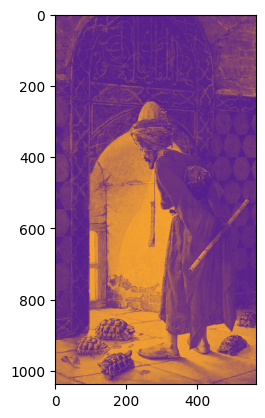

In [ ]:
def bicolor(f):

  # RGB
  dark_purple = np.array([74, 21, 148]) / 255
  bright_orange = np.array([253, 169, 42]) / 255

  mapped = sigmoid(f)

  bicolor = []

  row, col = f.shape

  for r in range(row):

    bicolor_row = []

    for c in range(col):

      pixel = []

      t = mapped[r,c]

      red = (1 - t)*dark_purple[0] + t*bright_orange[0]
      green = (1 - t)*dark_purple[1] + t*bright_orange[1]
      blue = (1 - t)*dark_purple[2] + t*bright_orange[2]

      pixel.append(red)
      pixel.append(green)
      pixel.append(blue)

      bicolor_row.append(pixel)

    bicolor.append(bicolor_row)

  return np.array(bicolor)

bicolor_hamdi = bicolor(mr_hamdi)
plt.imshow(bicolor_hamdi)

##4- Transformation Functions for Each Channel

Function below show how the grayscale value of pixel is taken and used to decide the value of one of the color channels of RGB.

Function for each channel is basically:


*   Normalizing the grayscale value
*   Give the normalized value to the sigmoid function and take the probability/ratio between purple and orange
*   Take linear combination of corresponding channel value from purple and orange using the ratio

What mainly differs is the values linearly combined. Each channels' functions are also plotted and can be found below.



###For color red:

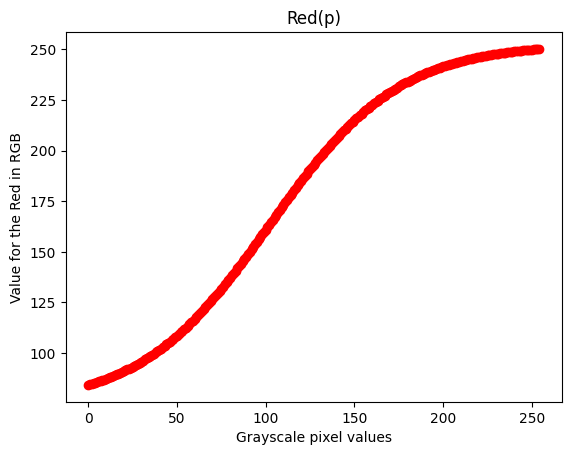

In [ ]:
# Pixel value range
hamdi_max = mr_hamdi.max()
hamdi_min = mr_hamdi.min()

pixel_values = [i for i in range(hamdi_min, hamdi_max)]

def red(p, maximum, minimum):

  norm_p = (p - minimum) / (maximum - minimum)
  sigmoid_p = 1 / (1 + np.exp(-7 *(norm_p-0.4)))
  red = (1 - sigmoid_p)*(74/255) + sigmoid_p*(253/255)

  return red

red_pixels = [255*red(j, hamdi_max, hamdi_min) for j in range(hamdi_min, hamdi_max)]

plt.plot(pixel_values, red_pixels, marker='o', linestyle='-', color='red')

plt.xlabel('Grayscale pixel values')
plt.ylabel('Value for the Red in RGB')
plt.title('Red(p)')

plt.show()


###For color green:

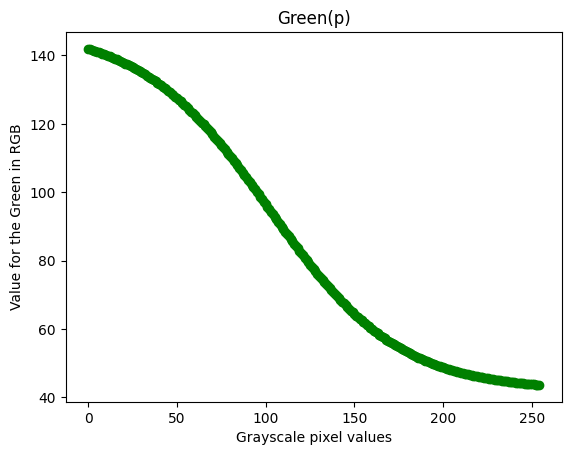

In [ ]:
def green(p, maximum, minimum):

  norm_p = (p - minimum) / (maximum - minimum)
  sigmoid_p = 1 / (1 + np.exp(-7 *(norm_p-0.4)))
  green = (1 - sigmoid_p)*(148/255) + sigmoid_p*(42/255)

  return green

green_pixels = [255*green(j, hamdi_max, hamdi_min) for j in range(hamdi_min, hamdi_max)]

plt.plot(pixel_values, green_pixels, marker='o', linestyle='-', color='green')

plt.xlabel('Grayscale pixel values')
plt.ylabel('Value for the Green in RGB')
plt.title('Green(p)')

plt.show()

###For color blue:

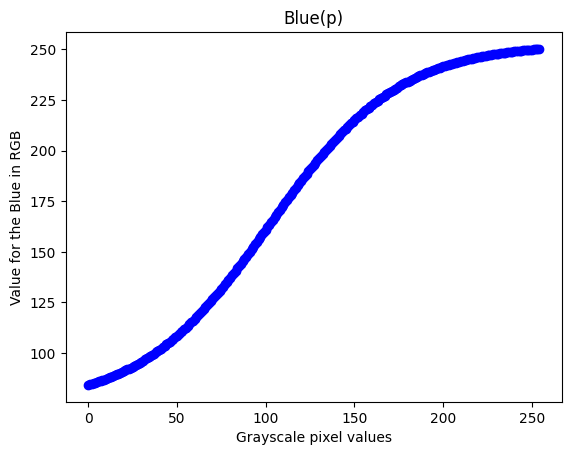

In [ ]:
def blue(p, maximum, minimum):

  norm_p = (p - minimum) / (maximum - minimum)
  sigmoid_p = 1 / (1 + np.exp(-7 *(norm_p-0.4)))
  blue = (1 - sigmoid_p)*(74/255) + sigmoid_p*(253/255)

  return blue

blue_pixels = [255*blue(j, hamdi_max, hamdi_min) for j in range(hamdi_min, hamdi_max)]

plt.plot(pixel_values, blue_pixels, marker='o', linestyle='-', color='blue')

plt.xlabel('Grayscale pixel values')
plt.ylabel('Value for the Blue in RGB')
plt.title('Blue(p)')

plt.show()

###All function plotted on the same graph for comparison:

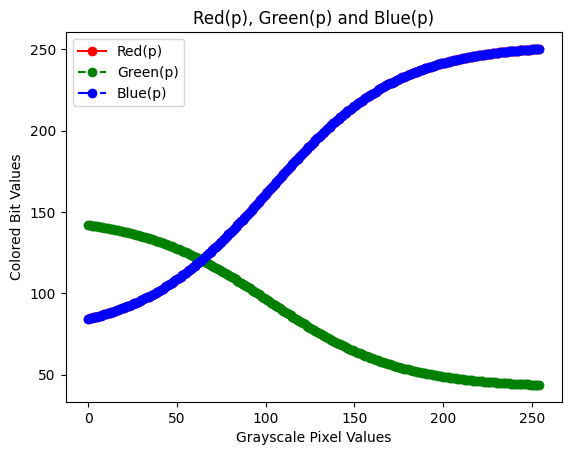

In [ ]:
plt.plot(pixel_values, red_pixels, marker='o', linestyle='-', color='red', label='Red(p)')
plt.plot(pixel_values, green_pixels, marker='o', linestyle='--', color='green', label='Green(p)')
plt.plot(pixel_values, blue_pixels, marker='o', linestyle='-.', color='blue', label='Blue(p)')

plt.xlabel('Grayscale Pixel Values')
plt.ylabel('Colored Bit Values')
plt.title('Red(p), Green(p) and Blue(p)')

plt.legend()

plt.show()